# Poisonous Mushroom Classification
By Joon-Ho Son

***

## Contents

- **1. Introduction**
    - 1.1 The Mushroom Dataset
    - 1.2 Mushroom Concepts
- **2. Data Preparation**
    - 2.1 Dataset Overview
    - 2.2 Incomplete Data
- **3. Exploratory Data Analysis**
    - 3.1 Testing for Association
    - 3.2 Dimensionality Reduction
- **4. Classification**
    - 4.1 Metrics Concepts
    - 4.2 Model Building
    - 4.3 Feature Importance
- **5. Conclusion**

***
    
## 1 Introduction

### 1.1 The Mushroom Dataset

This dataset is taken from The Audobon Society Field Guide and consists of 8124 entries corresponsing to 23 species of gilled mushroom in the Agaricus and Lepiota genera. Each entry has 22 features relating to the physical characteristics of each mushroom.

It is purely categorical and each species is identified as "definitely edible", "definitely poisonous", or of unknown edibility. The latter class has been merged with "definitely poisonous".

This dataset can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom).

The objective of this notebook is to explore any relationships that exist between the physical characteristics of mushrooms, and to accurately predict if a mushroom is safe to eat from these characteristics.

Included in the dataset is a file containing attribute information which is displayed in the table below. Note that not all of the given labels occur in the dataset.

|Feature|Label
|-------|-----
|cap-shape|bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
|cap-surface|fibrous=f, grooves=g, scaly=y, smooth=s
|cap-color|brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
|bruises?|bruises=t, no=f
|odor|almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
|gill-attachment|attached=a, descending=d, free=f, notched=n
|gill-spacing|close=c, crowded=w, distant=d
|gill-size|broad=b, narrow=n
|gill-color|black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
|stalk-shape|enlarging=e, tapering=t
|stalk-root|bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
|stalk-surface-above-ring|fibrous=f, scaly=y, silky=k, smooth=s
|stalk-surface-below-ring|fibrous=f, scaly=y, silky=k, smooth=s
|stalk-color-above-ring|brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
|stalk-color-below-ring|brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
|veil-type|partial=p, universal=u
|veil-color|brown=n, orange=o, white=w, yellow=y
|ring-number|none=n, one=o, two=t
|ring-type|cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
|spore-print-color|black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
|population|abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
|habitat|grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


***

### 1.2 Mushroom Concepts

The species of gilled mushroom contained in the dataset belong to the Agaricus and Lepiota genera, both contain edible and poisonous species.

Members of Agaricus are characterized by having a fleshy cap. They are distinguished from other members of their family, Agaricaceae, by their chocolate-brown spores. Members of Agaricus also have a stem or stipe, which elevates it above the object on which the mushroom grows, or substrate, and a partial veil, which protects the developing gills and later forms a ring or annulus on the stalk. It is a saprophytic fungus found growing on soil humus, decaying litter on forest floors, in the fields and lawns, wood logs and manure piles.

Most (but not all) Lepiota species have comparatively small caps and slender stems. The cap surface typically splits as the cap expands, breaking up into concentric rings of scales towards the margin. The gills beneath the cap are white to cream (rarely yellow) and are free. The gills are covered by a partial veil when young, which typically ruptures to leave a cuff-like ring often with additional scaly remains on the stem. Several species have a distinct, often rubbery, smell. The spore print is white to cream. They typically occur in rich humus in broadleaf or conifer woodland. A few species are more frequently found in calcareous grassland or in dunes.

The following images depict various physical features of mushrooms that can be found in our dataset.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os

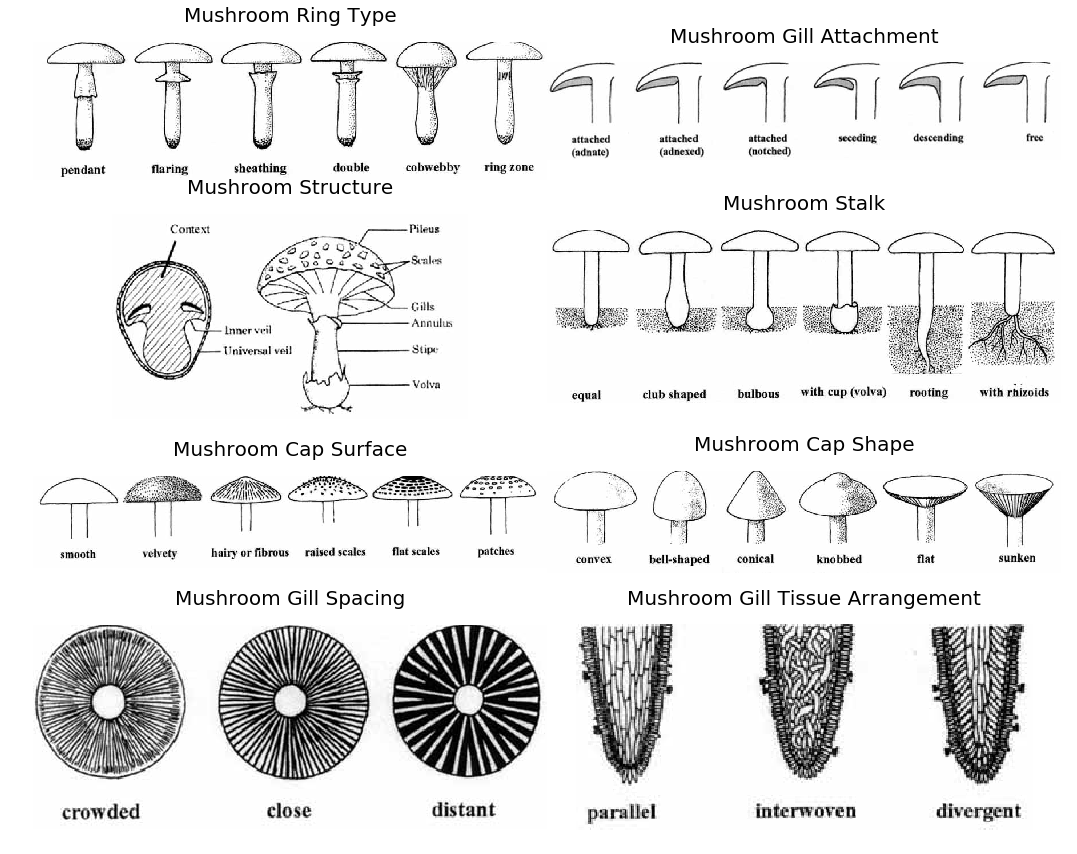

In [2]:
from PIL import Image

titles = {"mushroom1.jpg": "Mushroom Structure", 
          "mushroom-cap-shape.jpg": "Mushroom Cap Shape", 
          "mushroom-cap-surface.jpg": "Mushroom Cap Surface", 
          "mushroom-gill-attachment.jpg": "Mushroom Gill Attachment", 
          "mushroom-gill-spacing.jpg": "Mushroom Gill Spacing", 
          "mushroom-gill-tissue-arrangement.jpg": "Mushroom Gill Tissue Arrangement", 
          "mushroom-ring-type.jpg": "Mushroom Ring Type", 
          "mushroom-stalk.jpg": "Mushroom Stalk"}

fig, axarr = plt.subplots(4,2, figsize=(15, 12))
fig.tight_layout()

for i, filename in enumerate(os.listdir("img")):
    im = Image.open("img/" + filename)
    row = i // 2
    col = i % 2
    ax = axarr[row, col]
    ax.imshow(im)
    ax.axis("off")
    ax.set_title(titles[filename], fontsize=20, pad=20)

    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

***

## 2 Data Preparation

### 2.1 Dataset Overview

In [3]:
# Read dataset into pandas DataFrame
mushrooms = pd.read_csv("dataset.csv")

# Split into features and classes
X = mushrooms.loc[:, mushrooms.columns != "class"]
y = mushrooms["class"]

print("The dataset contains {} rows and {} columns. \n".format(mushrooms.shape[0], mushrooms.shape[1]))
print("Number of unique labels for each category: \n")
print(mushrooms.nunique().sort_values(ascending=False))
print()

class_counts = mushrooms["class"].value_counts()
class_counts.index = ["edible", "poisonous"]

print("Percentage of each class:")
print(class_counts/mushrooms.shape[0] * 100)
mushrooms.head()

The dataset contains 8124 rows and 23 columns. 

Number of unique labels for each category: 

gill-color                  12
cap-color                   10
spore-print-color            9
odor                         9
stalk-color-below-ring       9
stalk-color-above-ring       9
habitat                      7
population                   6
cap-shape                    6
stalk-root                   5
ring-type                    5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
veil-color                   4
cap-surface                  4
ring-number                  3
stalk-shape                  2
gill-size                    2
gill-spacing                 2
gill-attachment              2
bruises                      2
class                        2
veil-type                    1
dtype: int64

Percentage of each class:
edible       51.797144
poisonous    48.202856
Name: class, dtype: float64


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Note that veil type has only one label and therefore provides us with no additional information. So when we perform feature selection later, we will drop it.

Fortunately, we have relatively balanced set, slightly skewed towards the edible class, which will make our classifier easier to train.

***

## 2.2 Incomplete Data

Now let's check for missing data. Before looking for NaN values, it is important to note that a "?" label is actually already defined to denote missing values. 

In [4]:
# Replace the "?" label with NaN
mushrooms_na = mushrooms.replace("?", np.nan)

In [5]:
# Find rows and columns that contain a NaN value
narows = mushrooms_na[mushrooms_na.isnull().any(axis=1)]
nacols = mushrooms_na.columns[mushrooms_na.isna().any()].tolist()

# Calculate the percentage of rows and columns that contain a NaN value
percent_narows = round(len(narows)/mushrooms_na.shape[0]*100, 1)
percent_nacols = round(len(nacols)/mushrooms_na.shape[1]*100, 1)

print("There are {} row(s) ({}%) with NaN values.".format(len(narows), percent_narows))
print("There are {} column(s) ({}%) with NaN values.".format(len(nacols), percent_nacols))

There are 2480 row(s) (30.5%) with NaN values.
There are 1 column(s) (4.3%) with NaN values.


While a sizeable amount of rows contain a missing value, it seems to be isolated to a single column which is lucky. One way we could impute this data is to fill it with the mode (most frequent value). However, I ultimately feel that it is most wise to treat the missing "?" label as just another category, as it could potentially prove to be a useful feature. We can concretely determine its usefulness during feature selection.

***

## 3. Exploratory Data Analysis


### 3.1 Testing for Associations

It is very important to choose the correct statistical tests when exploring data.

Examining the structure of our dataset, we note that we have unordered categorical variables - referred to as nominal variables.

We have one independent variables with precisely two levels, and the nature of our dependent variables are categorical. This presents an ideal situation in which to apply the Chi squared test for independence.

First, we must check that we meet he required conditions to apply this test

1. The sampling method is random
2. The variables are categorical
3. The expected frequency count for each variable is greater than 5

Let's state our null and alternative hypotheses.

$H_{0}:$ A and B are independent

$H_{1}:$ A and B are dependent

In [6]:
# Define alpha
alpha = 0.05

values = {}
for col in X.columns.values:

    A, B = mushrooms[col], mushrooms["class"]

    dfObserved = pd.crosstab(A, B) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)
    values[col] = p
    if p < alpha:
        # Reject null hypothesis
        print("{} is important. (p = {})".format(col, p))
    else:
        # Accept null hypothesis
        print("{} is NOT important. (p = {})".format(col, p))

cap-shape is important. (p = 1.196456568593578e-103)
cap-surface is important. (p = 5.518427038649143e-68)
cap-color is important. (p = 6.055814598336574e-78)
bruises is important. (p = 0.0)
odor is important. (p = 0.0)
gill-attachment is important. (p = 5.501707411861009e-31)
gill-spacing is important. (p = 5.0229776137324786e-216)
gill-size is important. (p = 0.0)
gill-color is important. (p = 0.0)
stalk-shape is important. (p = 4.604746212155192e-20)
stalk-root is important. (p = 7.702047904943513e-290)
stalk-surface-above-ring is important. (p = 0.0)
stalk-surface-below-ring is important. (p = 0.0)
stalk-color-above-ring is important. (p = 0.0)
stalk-color-below-ring is important. (p = 0.0)
veil-type is NOT important. (p = 1.0)
veil-color is important. (p = 3.320972749169678e-41)
ring-number is important. (p = 4.23575764172306e-82)
ring-type is important. (p = 0.0)
spore-print-color is important. (p = 0.0)
population is important. (p = 0.0)
habitat is important. (p = 0.0)


In [7]:
sorted(values.items(), key=lambda x: x[1])

[('bruises', 0.0),
 ('odor', 0.0),
 ('gill-size', 0.0),
 ('gill-color', 0.0),
 ('stalk-surface-above-ring', 0.0),
 ('stalk-surface-below-ring', 0.0),
 ('stalk-color-above-ring', 0.0),
 ('stalk-color-below-ring', 0.0),
 ('ring-type', 0.0),
 ('spore-print-color', 0.0),
 ('population', 0.0),
 ('habitat', 0.0),
 ('stalk-root', 7.702047904943513e-290),
 ('gill-spacing', 5.0229776137324786e-216),
 ('cap-shape', 1.196456568593578e-103),
 ('ring-number', 4.23575764172306e-82),
 ('cap-color', 6.055814598336574e-78),
 ('cap-surface', 5.518427038649143e-68),
 ('veil-color', 3.320972749169678e-41),
 ('gill-attachment', 5.501707411861009e-31),
 ('stalk-shape', 4.604746212155192e-20),
 ('veil-type', 1.0)]

As expected, veil type is not an important feature because it has constant variance, and so we will drop it. The test indicates that, while they may vary in contribution, all the other features have some kind of significance.

In [8]:
# Drop the veil type column
mushrooms = mushrooms.drop(["veil-type"], axis=1)
X = X.drop(["veil-type"], axis=1)

The term "correlation" can be misleading, and when dealing with nominal variables it does not make sense to talk about "correlation" as there is no inherent order to the categories. Instead we favour the use of "association" as a measure of the stength of a relationship.

Cramer's V is a measure of association between nominal variables, giving a value between 0 and 1, with a score tending to 1 denoting a strong association. It is based on the chi squared statistic.

The statistic can often be over-optimistic when calculating the strength of association, so we apply a bias correction which is accounted for in the function below.

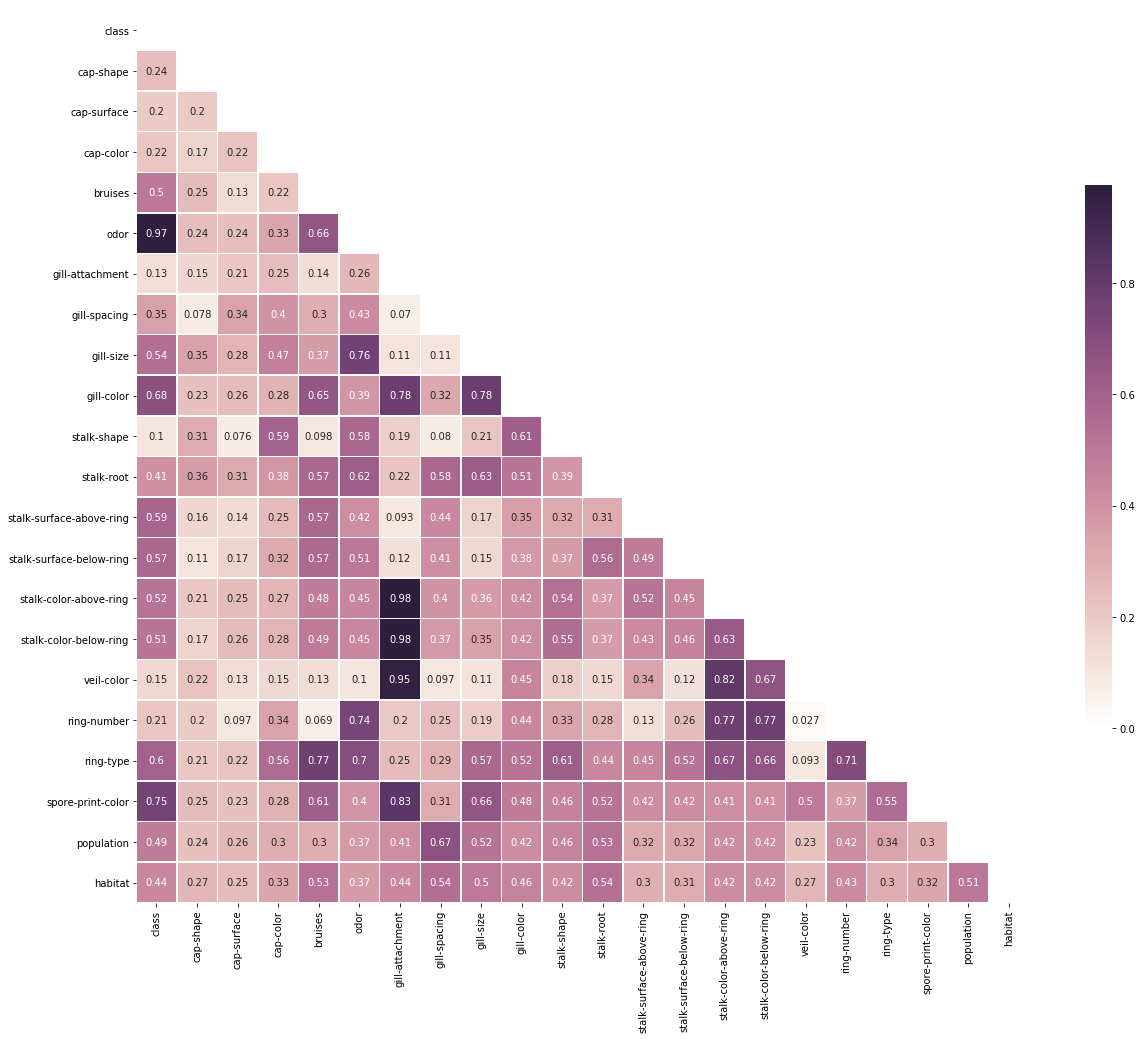

In [9]:
import itertools

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(mushrooms.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate correlations of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    A, B = mushrooms[col1], mushrooms[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("cramer.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.show()

There are numerous observations that could be made from this data.

One thing to note from these associations is that odor is strongly associated with the independent variable. This is a sign that it is a strong indicator of edibility. We can cross tabulate these two variables to investigate this relationship futher.

In [10]:
# Cross tabulate class with odor
class_odor = pd.crosstab(mushrooms["class"], mushrooms["odor"])

# Replace the category values to readable labels
class_odor.index = ["edible", "poisonous"]

odor_key = {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"}

columns = []
for col in class_odor.columns.values:
    columns.append(odor_key[col])
    
class_odor.columns = columns

class_odor

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
edible,400,0,0,400,0,3408,0,0,0
poisonous,0,192,2160,0,36,120,256,576,576


We find that edible and poisonous mushrooms have largely distinct smells.

It's interesting to note that poisonous mushrooms tend to have rather unappetising smells - perhaps this is indicative of an evolutionary adaption? Of course, without more supporting evidence and domain knowledge this is just speculation.

Another interesting association is that of spore print color with gill attachment. We can investigate this relationship in the same way as before.

In [11]:
# Cross tabulate spore print color with gill attachment
spc_ga = pd.crosstab(mushrooms["gill-attachment"], mushrooms["spore-print-color"])

# Replace the category values to readable labels
spc_ga.index = ["attached", "free"]

spc_key = {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"}

columns = []
for col in spc_ga.columns.values:
    columns.append(spc_key[col])
    
spc_ga.columns = columns

spc_ga

,buff,chocolate,black,brown,orange,green,purple,white,yellow
attached,48,0,0,48,48,0,0,18,48
free,0,1632,1872,1920,0,72,48,2370,0


Types of gill attachment are shown below.

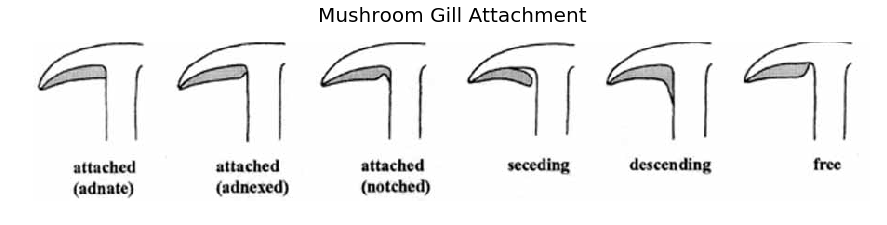

In [12]:
# Display a diagram showing gill attachment
im = Image.open("img/mushroom-gill-attachment.jpg")
fig = plt.figure(figsize=(15,15))
plt.imshow(im)
plt.axis("off")
plt.title("Mushroom Gill Attachment", fontsize=20, pad=20)
plt.show()

From this table we can discern that the majority of the mushrooms in our dataset have a free gill attachment. All mushrooms with chocolate, black, green or purple have a free gill attachment, whereas those with buff, orange, or yellow spots have exclusively attached gills.

As stated earlier, mushroom species beloning to the Lepiota genus have white to cream spores prints and free gills. Agaricus have chocolate brown spores and generally attached gills.

However, in the data we find that all of the mushrooms with chocolate spore prints have free gills. There is also a nuber of buff, orange, green and purple spore prints which do not occur in the genera that encompass this dataset. 

This could be an indication that sampling was not random, the data is mislabelled, or simply that I do not have enough domain knowledge to interpret these statistics properly. Furthermore, taxonomy is often a changing field, and given the age of the dataset it is possible that these species may have been reclassified since.

It may be worth noting that there is also a very strong association between gill attachment and veil and stalk colors, but I'm afraid I do not have enough domain knowledge to thouroughly investigate this.

***

### 3.2 Dimensionality Reduction

Dimensionality reduction is a common technique to extract important features from a high dimensional dataset and also to provide a visualisation in 2-D or 3-D space. We will be applying it for the latter purpose. These visualisations can provide a critical insight into hidden patterns in the data.

As we have categorical data Multiple Correspondence Analysis (MCA) may be most appropriate. Unfortunately, scikit does not support this natively. Instead, we can perform one-hot encoding and apply Principal Component Analysis which will give similar results.

This is done in two steps:
1. Integer encoding
This can be done using scikit's LabelEncoder
2. One-hot encoding
This can be done using scikit's OneHotEncoder

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

def labelencode(df):
    """
    Performs a label encoding of a dataframe
    
    Args:
        df: Dataframe to be encoded
        
    Returns:
        Label encoded dataframe
    """
    le = LabelEncoder()
    return df.apply(le.fit_transform)

def onehotencode(df):
    """
    Performs one-hot encoding of a dataframe
    
    Args:
        df: Dataframe to be encoded
        
    Returns:
        One-hot encoded labels   
    """
    enc = OneHotEncoder()
    enc.fit(df)

    return enc.transform(df).toarray()

def labelbinarise(df):
    """
    Performs label binarisation of a dataframe
    
    Args:
        df: Dataframe to be binarised
        
    Returns:
        Binarised labels 
    """
    lb = LabelBinarizer()
    
    return lb.fit_transform(df)

X_2 = labelencode(X)
onehotlabels = onehotencode(X_2)
y_2 = labelbinarise(y)

X_2.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


Above you can see how the labels have been converted to numerical digits instead.

Now we can perform dimensionality reduction techniques to give an insight into our data.

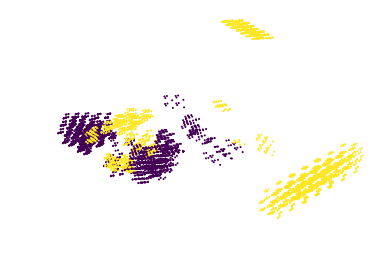

In [14]:
pca = PCA(n_components=2)

# Perform PCA on the one-hot encoded labels
projected = pca.fit_transform(onehotlabels)

plt.scatter(projected[:, 0], projected[:, 1], c=y_2.ravel(), s=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.axis("off")
plt.savefig("pca.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.show()

While there are discernable patterns, they overlap a lot and are not particularly distinct.

A more recent technique called t-SNE can be used to find create compelling 2-D "maps" from high-dimensional data. Unline PCA, t-SNE aims to maintain locality and forms "clusters". 

One thing I have learned when using t-SNE is that the perplexity parameter is key to getting a good result. I have often found it helpful to plot a number of perplexities to get the maximum value out of the transfomation. In their original [paper](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf), van der Maaten and Hinton recommend perplexity values between 5 and 50. Other important properties of t-SNE are that cluster sizes and distances between clusters are not necessarily meaningful - it can be useful to bear this in mind when interpreting t-SNE plots.

*NB: If you would like to run this yourself, be aware that scikit's implementation of t-SNE is quite slow*

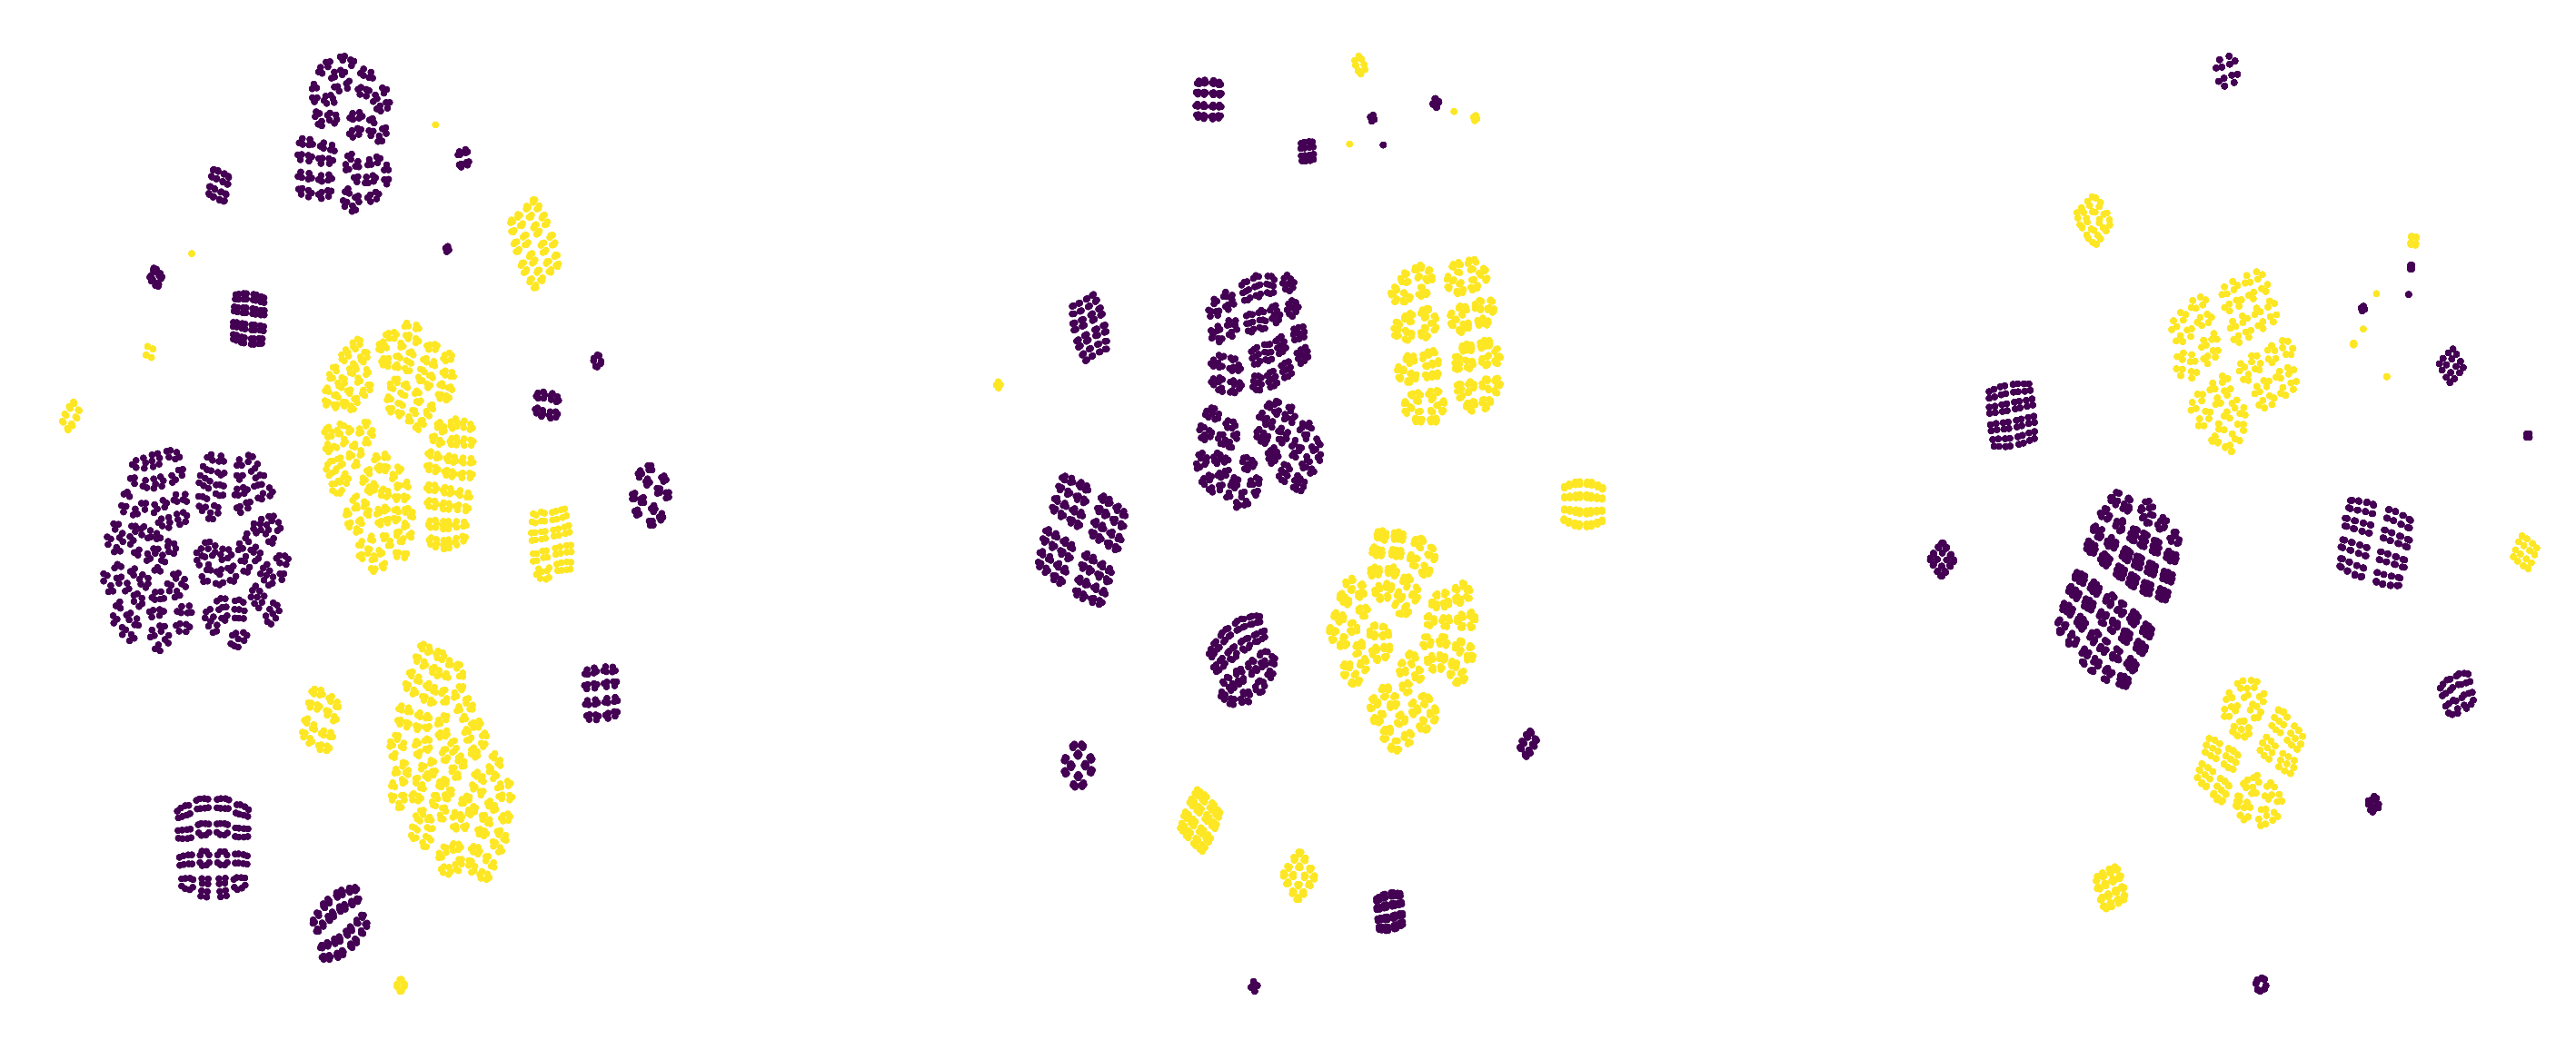

In [15]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(50,50))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Perplexities to test
perplexities = [5, 25, 50]

# Perform t-SNE on the one-hot encoded labels
for i, p in enumerate(perplexities, 1):
    ax = fig.add_subplot(2, 3, i)
    
    tsne = TSNE(n_components=2, perplexity=p)
    clusters = tsne.fit_transform(onehotlabels)
    plt.axis("off")

    plt.scatter(clusters[:, 0], clusters[:, 1], c=y_2.ravel())

plt.savefig("tsne.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)


The clusters that form are distinct between the two classes. Perhaps each of these represent a different species? This means that poisonous and edible mushrooms display identifying characteristics, and is a good indication that we will be able to train an effective classifier.

***

## 4 Classification 

Our task is to classify mushrooms as "poisonous" (1) or "not poisonous" (0).

For our classification model we will be using basic decision trees. While would probably get better results with ensemble methods, such as gradient boosting or random forests (the performance of which we will briefly evaluate later), the purpose of this study is to emphasise the methodology of hyperparameter tuning and in particular the choice of effective evaluation metrics.

***

### 4.1 Metrics Concepts

#### Basic terminology

- **True Positives (TP)**
    - Correctly predicited a mushroom is poisonous

- **True Negatives (TN)**
    - Correctly predicted a mushroom is edible

- **False Positives (FP)**
    - Incorrectly predicted a mushroom is poisonous
    - Type I error
- **False Negatives (FN)**
    - Incorrectly predicted a mushroom is edible
    - Type II error

#### K-fold cross validation

To evaluate our models, we use K-fold cross validation. This prevents overfitting, but the drawback is that it will take K times longer to test our model. We will be using a stratified variant of K-Fold, which preserves the percentage of samples for each class. This ensures that the balance of classes in the training and testing set reflects that of the whole dataset. For this to make sense, we must assume that the dataset is representative of the whole population. We also shuffle each stratification of the data before splitting into batches to prevent overfitting.



#### Accuracy
$A = \frac{TP + TN}{TP + TN + FP + FN}$

Accuracy is the percentage of correct predictions. This is the most basic and most intuitive metric, but does not give an insight into the underlying class distribution and is highly sensitive to class imbalance.

#### Null accuracy
The accuracy that could be achieved by simply always predicting the most frequent class. This acts as a kind of "baseline" for our accuracy metric and is particularly important when dealing with an imbalanced dataset.

#### Precision
$P = \frac{TP}{TP + FP}$

The number of true positives over the number of true positives plus the number of false positives. High precision indicates a **low false positive rate**.

#### Recall
$R = \frac{TP}{TP + FN}$

The number of true positives over the number of true positives plus the number of false negatives. High precision indicates a **low false negative rate**.

#### F1 Score
$ F_{1} = 2\times*\frac{P \times R}{P + R}$

The F1 score is calculated by taking the harmonic mean of the precision and recall and conveys a balance between these two metrics.

Below we define some utility functions to save time and help us evaluate the performance of our models.

In [16]:
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, ShuffleSplit

def calculate_cv(clf, X, y):
    """
    Performs cross validation on a model
    
    Args: 
        clf: The classifier to cross validate
        
    Returns:
        scores: Cross validation scores
    """
    
    # Define a function to calculate null accuracy
    def null_accuracy(ytrue, ypred): return 1-ytrue.mean()
    # Define a function to calculate the positive proportion of each set
    def pos_prop(ytrue, ypred): return ytrue.sum()/ytrue.shape[0] * 100
    
    # Define our scoring metrics
    scoring = {"precision": "precision", 
               "recall": "recall", 
               "accuracy": "accuracy", 
               "f1": "f1",
               "pos_prop": make_scorer(pos_prop),
               "null_accuracy": make_scorer(null_accuracy)}
    
    # Define our splitting method
    split = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross validation
    scores = cross_validate(clf, X, y.ravel(), scoring=scoring, cv=split, return_train_score=True)
    
    return scores

def print_cv(scores):
    """
    Prints the results of our cross validation
    
    Args:
        scores: The result of the cross validation
        
    Returns:
        Nothing
    """    
    
    # Print summary for each test
    print("Positive Proportion: {}".format(scores["test_pos_prop"]))
    print("Null accuracy:       {}".format(scores["test_null_accuracy"]))

    print("Accuracy:            {}".format(scores["test_accuracy"]))
    print("Precision:           {}".format(scores["test_precision"]))
    print("Recall:              {}".format(scores["test_recall"]))
    print("F1:                  {}".format(scores["test_f1"]))

    # Print average across K tests
    print("Average null accuracy: {} (+/- {})".format(scores["test_null_accuracy"].mean(), scores["test_null_accuracy"].std() * 2))
    print("Average accuracy:      {} (+/- {})".format(scores["test_accuracy"].mean(), scores["test_accuracy"].std() * 2))
    print("Average precision:     {} (+/- {})".format(scores["test_precision"].mean(), scores["test_precision"].std() * 2))
    print("Average recall:        {} (+/- {})".format(scores["test_recall"].mean(), scores["test_recall"].std() * 2))
    print("Average F1:            {} (+/- {})".format(scores["test_f1"].mean(), scores["test_f1"].std() * 2))

***

### 4.2 Model Building

Decision trees are the building blocks of some of the most powerful supervised learning methods that are used today. The goal of a decision tree is to split your data into groups such that every element in one group belongs to one category. This makes it ideal for a binary classification task.

To start with, let's train a decision tree with the default hyperparameters.

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [18]:
scores = calculate_cv(tree, X_2, y_2)
print_cv(scores)

Positive Proportion: [48.21648216 48.18461538 48.18461538 48.21428571 48.21428571]
Null accuracy:       [0.51783518 0.51815385 0.51815385 0.51785714 0.51785714]
Accuracy:            [1. 1. 1. 1. 1.]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average null accuracy: 0.5179714312747523 (+/- 0.0002983138213983213)
Average accuracy:      1.0 (+/- 0.0)
Average precision:     1.0 (+/- 0.0)
Average recall:        1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


We already have a perfect score! This is actually quite disappointing because we don't get a chance to investigate the effects of hyperparameter tuning. So instead, let's pretend that this didn't happen and create an artifically imbalanced dataset - just for fun.

In [19]:
# Perform undersampling
undersample_p = mushrooms.loc[mushrooms["class"] == "p"].sample(500)
undersample_e = mushrooms.loc[mushrooms["class"] == "e"]
undersample = pd.concat([undersample_p, undersample_e])

# Calculate proportions
class_counts = undersample["class"].value_counts()
class_counts.index = ["edible", "poisonous"]

print("Percentage of each class:")
print(class_counts/undersample.shape[0] * 100)

Percentage of each class:
edible       89.379779
poisonous    10.620221
Name: class, dtype: float64


In [20]:
# Split into features and classes
X_u = undersample.loc[:, undersample.columns != "class"]
y_u = undersample["class"]

# Perform encoding
X_u2 = labelencode(X_u)
y_u2 = labelbinarise(y_u)

In our imbalanced dataset, only 10% of the dataset is poisonous. One of the main challenges when dealing with imbalanced sets is that the null accuracy is now a lot greater, which makes the accuracy score an extremely misleading metric. 

To combat skewed data, commonly applied techniques involve oversampling, undersampling, and creating synthetic samples to close the gap. However, I would like to investigate what we can do with the (relatively limited) hyperparameters of the decision tree classifier.

In [21]:
undersample_tree = DecisionTreeClassifier(random_state=0)

undersample_tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [22]:
scores = calculate_cv(undersample_tree, X_u2, y_u2)
print_cv(scores)

Positive Proportion: [10.61571125 10.61571125 10.61571125 10.62699256 10.62699256]
Null accuracy:       [0.89384289 0.89384289 0.89384289 0.89373007 0.89373007]
Accuracy:            [0.99893843 1.         1.         1.         1.        ]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [0.99 1.   1.   1.   1.  ]
F1:                  [0.99497487 1.         1.         1.         1.        ]
Average null accuracy: 0.8937977622396556 (+/- 0.0001105337973463641)
Average accuracy:      0.9997876857749469 (+/- 0.000849256900212314)
Average precision:     1.0 (+/- 0.0)
Average recall:        0.998 (+/- 0.008000000000000007)
Average F1:            0.9989949748743718 (+/- 0.004020100502512581)


We can now select certain hyperparameters to optimise.

#### Class Weights
Weights associated with classes. Since the occurence of positive samples is low, I suspect that skewing the relative weights towards the positive class will increase the recall of our model. The "balanced" preset skews the class weights inversely proportional to the frequency of their occurrence in the data.

#### Criterion
This defines the function to measure the quality of a split. This can either be the "gini" for the Gini impurity or "entropy" for the information gain.

#### Splitter
This is the strategy used to choose the split at each node.

Other features I haven't considered such as max depth are mostly about reducing training time and/or memory usage. This isn't a particular concern in this case, so I have left them at their default values as they are unlikely to positively affect the performance of our classifier.

We will use F1 as our primary scoring metric, as it is least sensitive to unbalanced data.

In [23]:
from sklearn.model_selection import GridSearchCV

# Test class weighting of positive samples from 1 to 40
class_weights = [{0: 0, 1: i} for i in np.linspace(0.1, 10, 20, endpoint=True)] + ["balanced"]

param_dist = {"class_weight": class_weights,
              "criterion": ["gini", "entropy"],
              "splitter": ["random", "best"]}

# Define our splitting method
split = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform a grid search in the hyperparameter space
tree_cv = GridSearchCV(undersample_tree, param_dist, cv=split, scoring="f1", return_train_score=True)

tree_cv.fit(X_u2,y_u2)

# Output results
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))


print()
scores = calculate_cv(tree_cv.best_estimator_, X_u2, y_u2)
print_cv(scores)

Tuned Decision Tree Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'splitter': 'best'}

Positive Proportion: [10.61571125 10.61571125 10.61571125 10.62699256 10.62699256]
Null accuracy:       [0.89384289 0.89384289 0.89384289 0.89373007 0.89373007]
Accuracy:            [1. 1. 1. 1. 1.]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average null accuracy: 0.8937977622396556 (+/- 0.0001105337973463641)
Average accuracy:      1.0 (+/- 0.0)
Average precision:     1.0 (+/- 0.0)
Average recall:        1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


From our grid search in the hyperparameter space, we find a marginal (very marginal) improvement in performance acrross the board. The improvement in recall should be noted. This is important as a false negative (identifying a poisonous mushroom as edible) is much more expensive (potentially lethal) than a false positive (identifying an edible mushroom as poisonous). At this point, to improve classifier performance it would be better to test a different model rather than trying to tune the decision tree any further.

We can also visualise this tree using graphviz. Color/value denotes the number of values in each class.

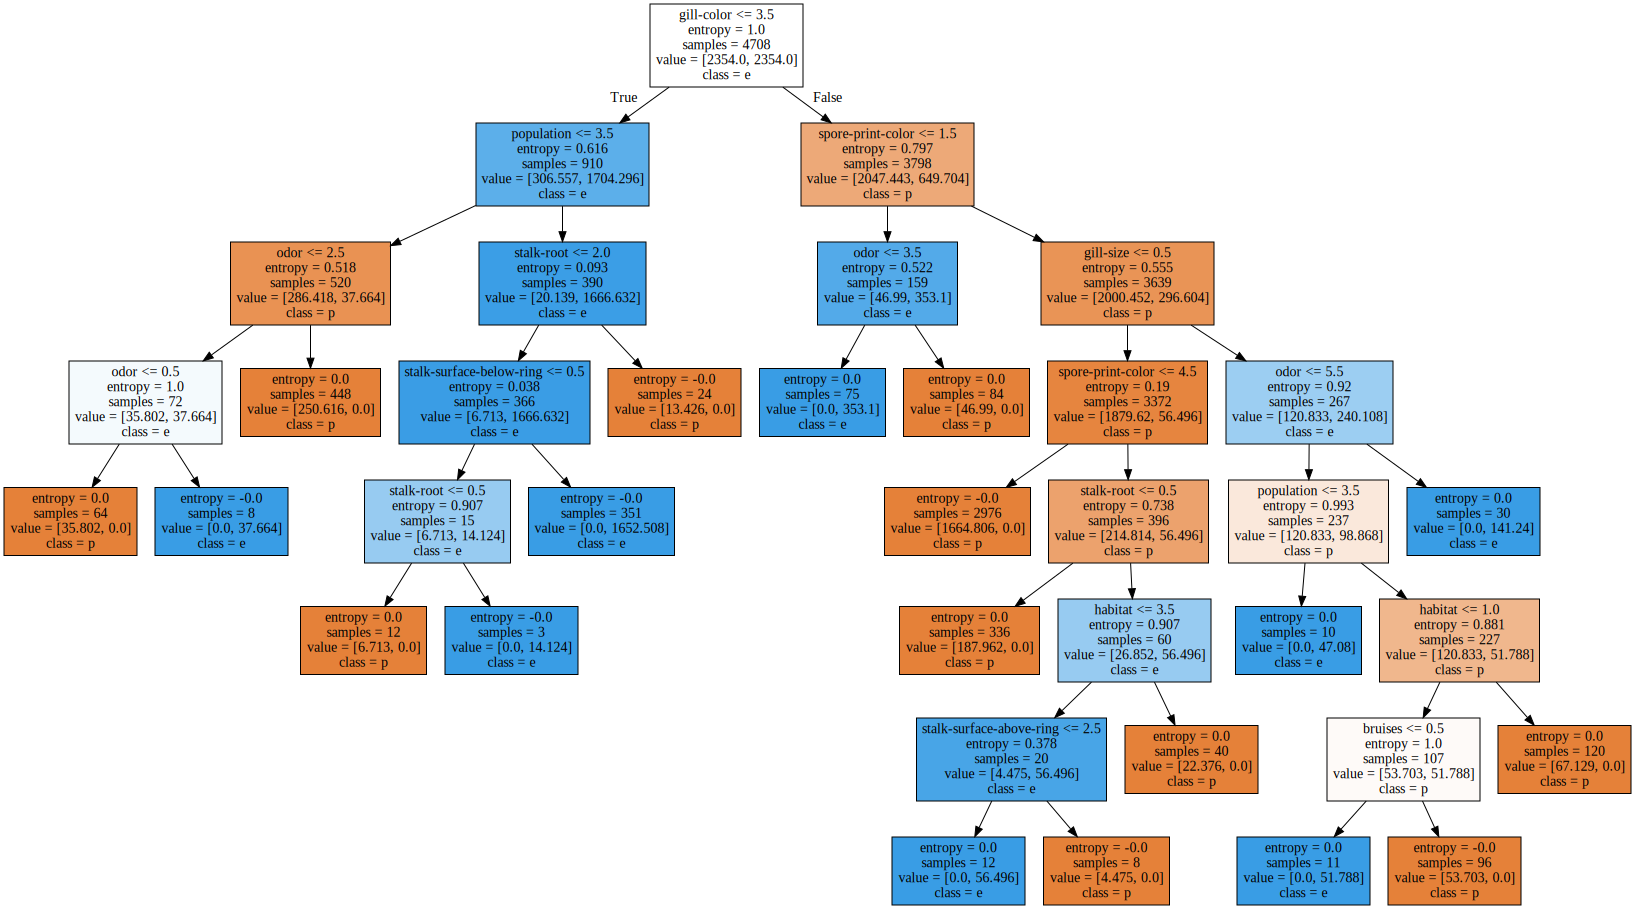

In [24]:
from graphviz import Source
from sklearn.tree import export_graphviz

graph = Source(export_graphviz(tree_cv.best_estimator_, out_file=None, feature_names=X_u2.columns, class_names=y, filled=True))
graph

As noted earlier, performance could likely be improved by using an ensemble algorthim such as a random forest classifier. 

Random forests reduce the effect of overfitting which is common with individual decision trees. An ensemble of random decision trees are "averaged" to create a random forest.

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)

scores = calculate_cv(forest, X_u2, y_u2)
print_cv(scores)

Positive Proportion: [10.61571125 10.61571125 10.61571125 10.62699256 10.62699256]
Null accuracy:       [0.89384289 0.89384289 0.89384289 0.89373007 0.89373007]
Accuracy:            [0.99893843 1.         1.         1.         1.        ]
Precision:           [1. 1. 1. 1. 1.]
Recall:              [0.99 1.   1.   1.   1.  ]
F1:                  [0.99497487 1.         1.         1.         1.        ]
Average null accuracy: 0.8937977622396556 (+/- 0.0001105337973463641)
Average accuracy:      0.9997876857749469 (+/- 0.000849256900212314)
Average precision:     1.0 (+/- 0.0)
Average recall:        0.998 (+/- 0.008000000000000007)
Average F1:            0.9989949748743718 (+/- 0.004020100502512581)


With some tuning, this model would likely out-perform a single decision tree.



### Other models

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_2, y_2.ravel())
scores = calculate_cv(lda, X_2, y_2)
print_cv(scores)

Positive Proportion: [48.21648216 48.18461538 48.18461538 48.21428571 48.21428571]
Null accuracy:       [0.51783518 0.51815385 0.51815385 0.51785714 0.51785714]
Accuracy:            [0.94526445 0.94153846 0.94584615 0.94334975 0.94519704]
Precision:           [0.95306389 0.95623342 0.95904888 0.95761589 0.94832041]
Recall:              [0.93239796 0.92081737 0.92720307 0.92337165 0.93742018]
F1:                  [0.94261767 0.93819128 0.94285714 0.94018205 0.94283879]
Average null accuracy: 0.5179714312747523 (+/- 0.0002983138213983213)
Average accuracy:      0.9442391732117397 (+/- 0.0031794354697763207)
Average precision:     0.9548564983281995 (+/- 0.007643040769567566)
Average recall:        0.9282420439440144 (+/- 0.012047765799197155)
Average F1:            0.9413373875525712 (+/- 0.003734783766545134)


***

### 4.3 Feature Importance 

An interesting obervation is how feature importance varies across these classifiers.

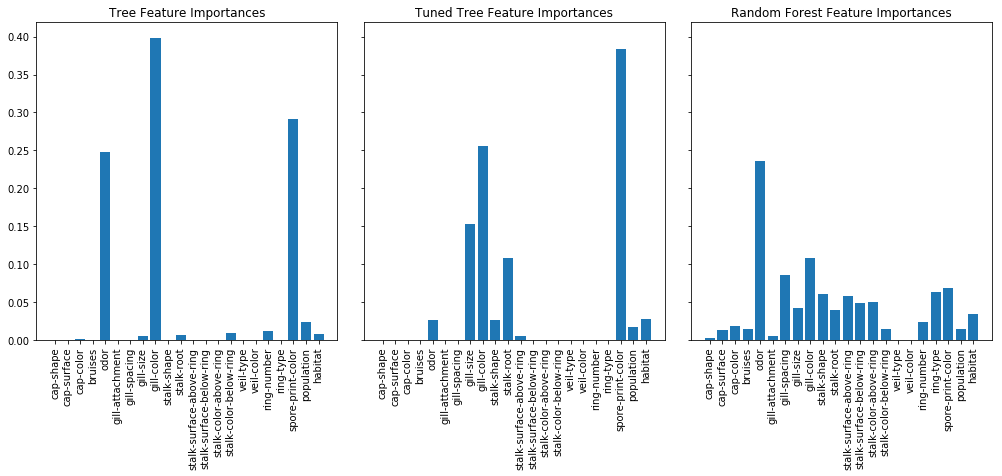

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,5))
plt.tight_layout()

# Fit models
tree.fit(X_u2, y_u2.ravel())
tree_cv.best_estimator_.fit(X_u2, y_u2.ravel())
forest.fit(X_u2, y_u2.ravel())

# Plot tree feature importances
tree_feature_importances = tree.feature_importances_
ax1.bar(X_u2.columns, tree_feature_importances)
ax1.set_title("Tree Feature Importances")
plt.sca(ax1)
plt.xticks(rotation="vertical")

# Plot tuned tree feature importances
tuned_tree_feature_importances = tree_cv.best_estimator_.feature_importances_
ax2.bar(X_u2.columns, tuned_tree_feature_importances)
ax2.set_title("Tuned Tree Feature Importances")
plt.sca(ax2)
plt.xticks(rotation="vertical")

# Plot gradient boosting feature importances
forest_feature_importances = forest.feature_importances_
ax3.bar(X_u2.columns, forest_feature_importances)
ax3.set_title("Random Forest Feature Importances")
plt.sca(ax3)
plt.xticks(rotation="vertical")

plt.savefig("featureimportance.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)

plt.show()

The basic tree model is heavily biased towards a few features with strong importance. Interestingly, gill colour is the most important feature here, despite the fact that it is the 3rd most strongly associated variable. This is then adjusted in the tuned model, and gill-size becomes the most important feature. There is a much greater variance in the random forest model due to the fact that the features of many individual trees are averaged. As predicted, odour appears to be an important feature. 

***

## 5 Conclusion

The purpose of this study was to examine associations between the physical characteristics of mushrooms, and to build a model that accurately predicts the edibility of a mushroom given these characteristics. The results of my exporations into these associations was intriguing and invites further study. 

From the model creation, testing, and evalution, it was concluded that we could achieve a "perfect" score when predicting the edibility of mushrooms based on these physical characteristics. We also found that while association is an indicator of feature importance, it is not necessarily predictive. However, as noted in Section 3, I have some reservations about the degree to which the data is representative of the real-world population of mushrooms in these particular genera. During this process we considered multiple metrics and their appropriateness for the task at hand.

In future I would like to investigate the effectiveness of this model on new, unseen data - potentially combining mutliple datasets from different sources. I expect this would require a significant amount of data wrangling, but may result in a more interesting challenge.

I would also like to observe what effect masking and introducing particular features would have on relative feature importance and model performance.

I will continue to revisit and revise this project, and any criticisms and suggestions are welcome.